In [2]:
# Step 3: Linear Regression Implementation

## 3.1 Load CSV data

In [ ]:
import pandas as pd


df = pd.read_csv("../data/raw/california.csv")
df.head()

## 3.2 Choose ONE feature and target

(keep this same as your config)

In [4]:
X = df[["MedInc"]]         # feature
y = df["MedHouseVal"]      # target

## 3.3 Train-test split

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.4 Model 1 — sklearn Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression


sk_model = LinearRegression()
sk_model.fit(X_train, y_train)


sk_pred = sk_model.predict(X_test)
sk_model.coef_, sk_model.intercept_

(array([0.41933849]), np.float64(0.44459729169078677))

## 3.5 Evaluation (RMSE, MAE, R2)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


sk_rmse = np.sqrt(mean_squared_error(y_test, sk_pred))
sk_mae = mean_absolute_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)


sk_rmse, sk_mae, sk_r2

(np.float64(0.8420901241414454), 0.629908653009376, 0.45885918903846656)

## 3.6 Plot regression line (sklearn)

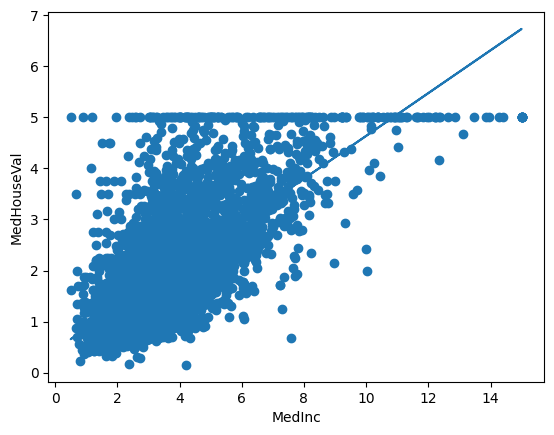

In [10]:
import matplotlib.pyplot as plt


plt.scatter(X_test, y_test)
plt.plot(X_test, sk_pred)
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

# Step 4: Model 2 — From Scratch (Gradient Descent)

## 4.1 Prepare numpy arrays

In [14]:
import numpy as np


X_np = X_train.values.flatten()
y_np = y_train.values


theta0 = 0.0
theta1 = 0.0
lr = 0.01
n = len(X_np)
iterations = 1000

## 4.2 Gradient descent loop

In [15]:
for i in range(iterations):
    y_pred = theta0 + theta1 * X_np


    d0 = (2/n) * np.sum(y_pred - y_np)
    d1 = (2/n) * np.sum((y_pred - y_np) * X_np)


    theta0 -= lr * d0
    theta1 -= lr * d1


theta0, theta1

(np.float64(0.4363679645584583), np.float64(0.42106472494245356))

## 4.3 Predict using scratch model

In [16]:
X_test_np = X_test.values.flatten()
scratch_pred = theta0 + theta1 * X_test_np

## 4.4 Evaluate scratch model

In [18]:
scratch_rmse = np.sqrt(mean_squared_error(y_test, scratch_pred))
scratch_mae = mean_absolute_error(y_test, scratch_pred)
scratch_r2 = r2_score(y_test, scratch_pred)


scratch_rmse, scratch_mae, scratch_r2

(np.float64(0.8421574410415126), 0.6294554764266899, 0.45877266771045633)

## 4.5 Plot scratch regression line

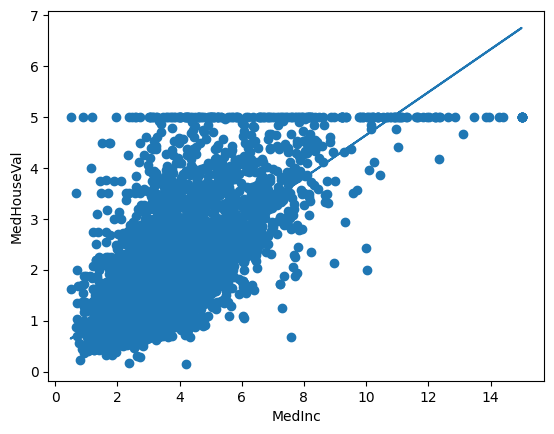

In [19]:
plt.scatter(X_test_np, y_test)
plt.plot(X_test_np, scratch_pred)
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

# Step 5: Comparison Summary

In [20]:
summary = pd.DataFrame({
    "Model": ["Sklearn", "From Scratch"],
    "RMSE": [sk_rmse, scratch_rmse],
    "MAE": [sk_mae, scratch_mae],
    "R2": [sk_r2, scratch_r2]
})
summary

,Model,RMSE,MAE,R2
0,Sklearn,0.842090,0.629909,0.458859
1,From Scratch,0.842157,0.629455,0.458773


In [21]:
import pandas as pd

results = pd.DataFrame({
    "rmse": [sk_rmse],
    "r2": [sk_r2]
})

results.to_csv("../experiments/results.csv", index=False)
results

,rmse,r2
0,0.84209,0.458859


In [25]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

from src.data_loader import load_csv
from src.model import train
from src.evaluation import rmse, mae, r2